# WeatherPy
----



###   Analysis:

* As cities approach the equator (Latitude = 0), they have a higher maximum temperature.
* There is not a strong correlation between latitude and either humidity, cloudiness, or windspeed. 
* In the northern hemisphere on the date that the data was pulled (Oct 30, 2020) there is a high proportion of cities with humidity of greater than 60%. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from pprint import pprint

# Import API key
weather_api_key = "4b0e3b0aab2982b37f2f4173ef8a6955"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "imperial"
lat = []
lng = []
max_temp =[]
humidity = []
cloud = []
wind_speed = []
country = []
date = []
city_name = []
x = 1

for city in cities:
    try:
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
        response = requests.get(query_url).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(response['name'])
        print(f"Processing Record {x} of {len(cities)} | {city}")
    except:
        print("City not found. Skipping....")
    x=x+1

print("--------------------------------")
print("Data Retrieval Complete")
print("--------------------------------")
    


Processing Record 1 of 603 | chicama
Processing Record 2 of 603 | busselton
Processing Record 3 of 603 | sampit
Processing Record 4 of 603 | san ramon de la nueva oran
Processing Record 5 of 603 | bredasdorp
City not found. Skipping....
Processing Record 7 of 603 | punta arenas
Processing Record 8 of 603 | ahipara
City not found. Skipping....
Processing Record 10 of 603 | anadyr
Processing Record 11 of 603 | cape town
City not found. Skipping....
Processing Record 13 of 603 | pionerskiy
Processing Record 14 of 603 | ust-shonosha
Processing Record 15 of 603 | butaritari
Processing Record 16 of 603 | vostok
Processing Record 17 of 603 | clyde river
City not found. Skipping....
Processing Record 19 of 603 | luderitz
Processing Record 20 of 603 | arraial do cabo
Processing Record 21 of 603 | kapaa
Processing Record 22 of 603 | kaitangata
City not found. Skipping....
Processing Record 24 of 603 | juegang
Processing Record 25 of 603 | albany
Processing Record 26 of 603 | saskylakh
Processing

City not found. Skipping....
Processing Record 212 of 603 | barcelos
Processing Record 213 of 603 | magistralnyy
City not found. Skipping....
Processing Record 215 of 603 | hasaki
Processing Record 216 of 603 | tiksi
Processing Record 217 of 603 | tiznit
Processing Record 218 of 603 | karratha
Processing Record 219 of 603 | khatanga
Processing Record 220 of 603 | mangaratiba
Processing Record 221 of 603 | batemans bay
Processing Record 222 of 603 | grand haven
Processing Record 223 of 603 | flinders
City not found. Skipping....
Processing Record 225 of 603 | kichera
Processing Record 226 of 603 | springbok
Processing Record 227 of 603 | geraldton
Processing Record 228 of 603 | vozdvizhenka
Processing Record 229 of 603 | saint-pierre
Processing Record 230 of 603 | soto la marina
Processing Record 231 of 603 | barrow
City not found. Skipping....
Processing Record 233 of 603 | arlit
Processing Record 234 of 603 | urumqi
Processing Record 235 of 603 | enshi
Processing Record 236 of 603 | p

Processing Record 421 of 603 | salinas
Processing Record 422 of 603 | yakima
Processing Record 423 of 603 | noumea
Processing Record 424 of 603 | umm kaddadah
Processing Record 425 of 603 | broome
Processing Record 426 of 603 | king city
Processing Record 427 of 603 | cozumel
Processing Record 428 of 603 | coro
Processing Record 429 of 603 | mairi
Processing Record 430 of 603 | gorey
Processing Record 431 of 603 | asau
Processing Record 432 of 603 | sehithwa
Processing Record 433 of 603 | jaisalmer
Processing Record 434 of 603 | olhao
Processing Record 435 of 603 | cherskiy
Processing Record 436 of 603 | oussouye
Processing Record 437 of 603 | north bend
Processing Record 438 of 603 | abu dhabi
Processing Record 439 of 603 | vanimo
City not found. Skipping....
Processing Record 441 of 603 | luena
Processing Record 442 of 603 | rochefort
Processing Record 443 of 603 | xiuyan
Processing Record 444 of 603 | okhotsk
Processing Record 445 of 603 | inongo
Processing Record 446 of 603 | toama

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({"City": city_name, "Lat":lat, "Lng":lng,"Max Temp": max_temp, 
                           "Humidity":humidity, "Cloudiness": cloud, "Wind Speed": wind_speed, 
                          "Country":country, "Date": date})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chicama,-7.84,-79.15,64.40,77,90,9.17,PE,1604084130
1,Busselton,-33.65,115.33,61.00,59,0,3.04,AU,1604084130
2,Sampit,-2.53,112.95,76.68,93,100,2.13,ID,1604084027
3,Orán,-23.13,-64.33,78.01,37,0,1.99,AR,1604084130
4,Bredasdorp,-34.53,20.04,53.60,62,0,4.70,ZA,1604083887


In [5]:
weather_df.to_csv('output.csv', index = False)

In [6]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,19.870162,19.582108,58.450955,70.859459,52.868468,7.843351,1.604084e+09
std,33.797332,91.097732,23.001808,22.235572,41.248770,5.810492,9.207034e+01
min,-54.800000,-179.170000,-11.900000,1.000000,0.000000,0.110000,1.604083e+09
25%,-8.055000,-60.225000,42.800000,58.000000,1.000000,3.360000,1.604084e+09
50%,24.140000,24.150000,64.000000,76.000000,68.000000,6.580000,1.604084e+09
75%,47.635000,100.085000,76.260000,88.000000,96.000000,10.470000,1.604084e+09
max,78.220000,179.320000,97.660000,100.000000,100.000000,33.330000,1.604084e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

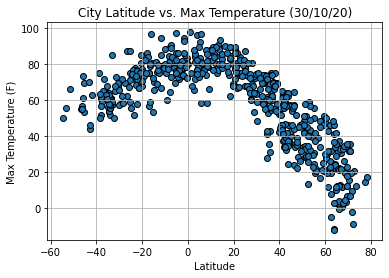

In [7]:
latitude = weather_df['Lat']
temperature = weather_df['Max Temp']

plt.scatter(latitude, temperature, edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (30/10/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig('Images/Latitude_vs_ Temp.png')
plt.show()

## Latitude vs. Humidity Plot

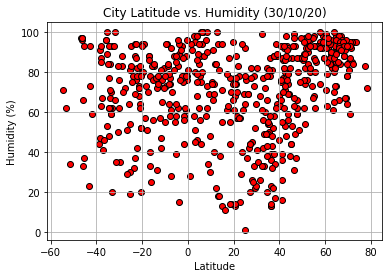

In [8]:
latitude = weather_df['Lat']
humidity = weather_df['Humidity']

plt.scatter(latitude, humidity, facecolor = 'red',edgecolor = "black")
plt.title("City Latitude vs. Humidity (30/10/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig('Images/Latitude_vs_ Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

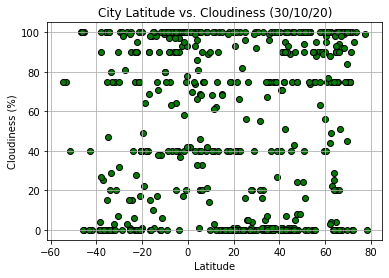

In [9]:
latitude = weather_df['Lat']
cloudiness = weather_df['Cloudiness']

plt.scatter(latitude, cloudiness, facecolor = 'green',edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (30/10/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig('Images/Latitude_vs_ Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

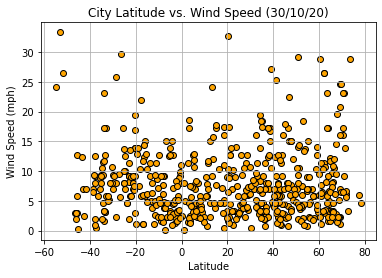

In [10]:
latitude = weather_df['Lat']
wind_speed = weather_df['Wind Speed']

plt.scatter(latitude, wind_speed, facecolor = 'orange',edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (30/10/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig('Images/Latitude_vs_ Wind.png')
plt.show()

## Linear Regression

In [11]:
northern_hem = weather_df.loc[weather_df['Lat']>0]
southern_hem = weather_df.loc[weather_df['Lat']<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7724820196028909


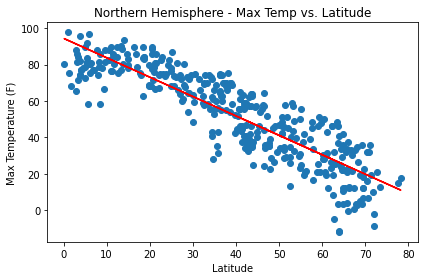

In [12]:
latitude = northern_hem['Lat']
temperature = northern_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, temperature)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(latitude, temperature)
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(15,-20),fontsize=15,color="red")
plt.tight_layout()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Images/NH_Latitude_vs_ Temp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4891682570060315


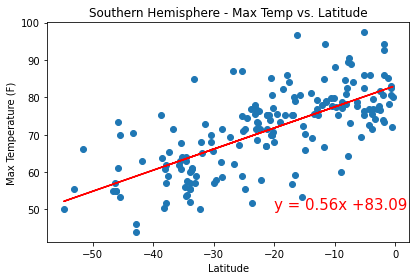

In [13]:
latitude = southern_hem['Lat']
temperature = southern_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, temperature)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(latitude, temperature)
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(-20,50),fontsize=15,color="red")
plt.tight_layout()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Images/SH_Latitude_vs_ Temp.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.11772788455823453


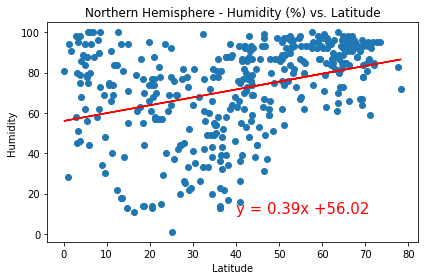

In [14]:
latitude = northern_hem['Lat']
humidity = northern_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(latitude, humidity)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.tight_layout()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Images/NH_Latitude_vs_ Humidity.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.005350601882732941


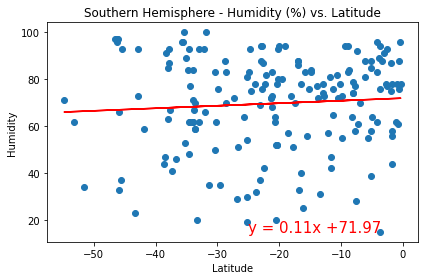

In [15]:
latitude = southern_hem['Lat']
humidity = southern_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(latitude, humidity)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.tight_layout()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Images/SH_Latitude_vs_ Humidity.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.02217672219272206


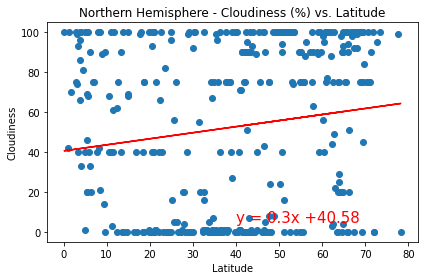

In [16]:
latitude = northern_hem['Lat']
cloudiness = northern_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, cloudiness)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(latitude, cloudiness)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(40,5),fontsize=15,color="red")
plt.tight_layout()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Images/NH_Latitude_vs_ Cloudiness.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07906865127457323


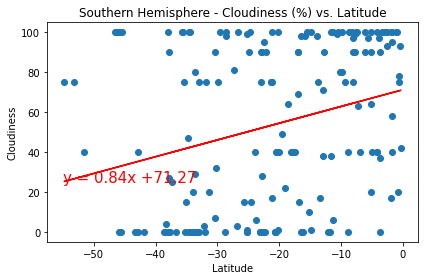

In [17]:
latitude = southern_hem['Lat']
cloudiness = southern_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, cloudiness)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(latitude, cloudiness)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.tight_layout()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Images/SH_Latitude_vs_ Cloudiness.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.013033770977444679


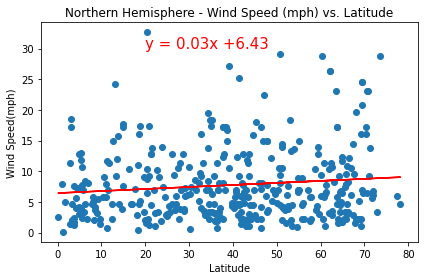

In [18]:
latitude = northern_hem['Lat']
wind_speed = northern_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, wind_speed)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(latitude, wind_speed)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.tight_layout()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Images/NH_Latitude_vs_ Wind.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04383977965160686


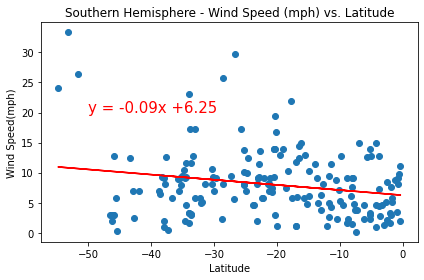

In [19]:
latitude = southern_hem['Lat']
wind_speed = southern_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, wind_speed)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(latitude, wind_speed)
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.tight_layout()
print(f"The r-value is: {rvalue**2}")
plt.savefig('Images/SH_Latitude_vs_ Wind.png')
plt.show()